In [7]:
# ============================================
# 📌 코랩 한글 폰트 깨짐 해결 (확실 버전)
# ============================================

# 1. 나눔 폰트 설치
!apt-get -qq install fonts-nanum

# 2. matplotlib에 폰트 강제 등록
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import glob

# 설치된 나눔 폰트 확인
font_list = glob.glob("/usr/share/fonts/truetype/nanum/*.ttf")
print("📌 설치된 폰트:", font_list)

# 나눔고딕 또는 코딩체 경로 지정
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
if not fm.FontProperties(fname=font_path).get_name():
    font_path = "/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf"

# matplotlib 기본 폰트 교체
font_name = fm.FontProperties(fname=font_path).get_name()
mpl.rc("font", family=font_name)
mpl.rc("axes", unicode_minus=False)

print("✅ 적용된 폰트:", font_name)



📌 설치된 폰트: ['/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothic.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf']
✅ 적용된 폰트: NanumGothic


/tmp/ipython-input-1784962873.py:72: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1784962873.py:72: UserWarning: Glyph 45944 (\N{HANGUL SYLLABLE DEL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1784962873.py:72: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1784962873.py:72: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1784962873.py:72: UserWarning: Glyph 51025 (\N{HANGUL SYLLABLE EUNG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1784962873.py:72: UserWarning: Glyph 52293 (\N{HANGUL SYLLABLE CAEG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1784962873.py:72: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  plt.tight_lay

=== 성능 비교 결과 ===
            model  avg_score  error_rate
0   qwen_analysis      1.000        0.00
1       qwen_base      1.220        0.00
2    qwen_keyword      1.340        0.46
3  gemma_analysis      1.000        1.00
4      gemma_base      1.235        0.00
5   gemma_keyword      1.000        0.98


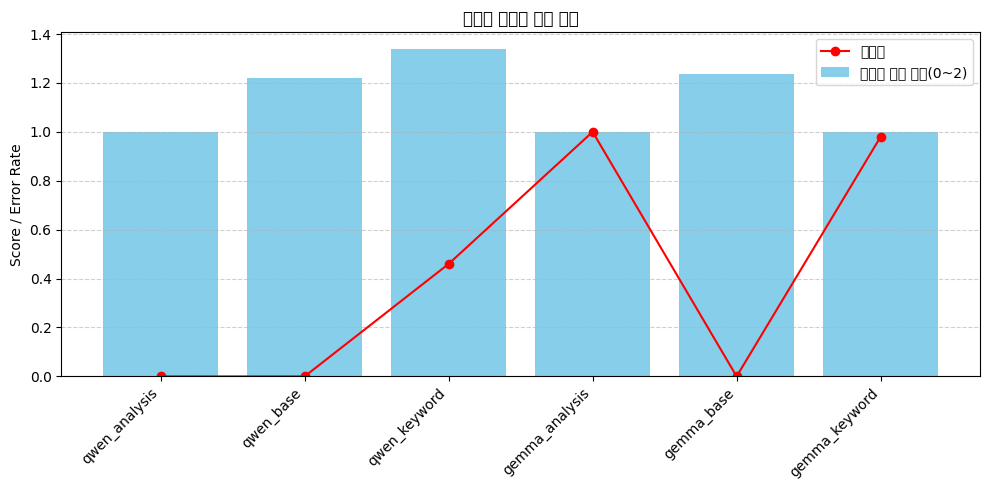

In [8]:
# ============================================
# 📌 모델별 대응책 성능 비교 자동화 코드
# (코랩 A100 환경에서 실행 가능)
# ============================================

import pandas as pd
import re
import matplotlib.pyplot as plt

# 1) 업로드된 CSV 경로 지정
files = {
    "qwen_analysis": "/content/drive/MyDrive/AYE/qwen_analysis_sample50.csv",
    "qwen_base": "/content/drive/MyDrive/AYE/qwen_base_sample50.csv",
    "qwen_keyword": "/content/drive/MyDrive/AYE/qwen_keyword_sample50.csv",
    "gemma_analysis": "/content/drive/MyDrive/AYE/gemma_analysis_sample50.csv",
    "gemma_base": "/content/drive/MyDrive/AYE/gemma_base_sample200.csv",
    "gemma_keyword": "/content/drive/MyDrive/AYE/gemma_keyword_sample50.csv",
}



# 2) 대응책 키워드 사전 정의
keywords = ["신고", "경찰", "112", "금감원", "고객센터", "차단", "환급", "금융기관", "은행"]

def score_response(text):
    """응답 텍스트에서 대응책 점수 계산"""
    if not isinstance(text, str) or len(text.strip()) == 0:
        return 0  # 대응 없음
    found = [kw for kw in keywords if kw in text]
    if len(found) == 0:
        return 1  # 대응 모호
    return 2  # 대응 구체적

def calc_metrics(df):
    outputs = df["model_output"].astype(str)

    # 대응 점수
    scores = [score_response(x) for x in outputs]
    avg_score = sum(scores) / len(scores)

    # 에러율 (JSON 깨짐, error 키워드, **** 표시 등)
    error_pattern = re.compile(r"error|Traceback|Exception|\*{5,}", re.IGNORECASE)
    error_count = sum(bool(error_pattern.search(x)) for x in outputs)
    error_rate = error_count / len(outputs)

    return avg_score, error_rate

# 3) 모든 파일에 대해 계산
results = {}
for name, path in files.items():
    df = pd.read_csv(path)
    results[name] = calc_metrics(df)

# 4) 결과 정리 (표)
metrics_df = pd.DataFrame(results, index=["avg_score", "error_rate"]).T
metrics_df = metrics_df.reset_index().rename(columns={"index": "model"})
print("=== 성능 비교 결과 ===")
print(metrics_df)

# 5) 시각화
plt.figure(figsize=(10,5))
# 대응책 점수 막대그래프
plt.bar(metrics_df["model"], metrics_df["avg_score"], color="skyblue", label="대응책 평균 점수(0~2)")
# 에러율 라인그래프
plt.plot(metrics_df["model"], metrics_df["error_rate"], color="red", marker="o", label="에러율")

plt.xticks(rotation=45, ha="right")
plt.ylabel("Score / Error Rate")
plt.title("모델별 대응책 성능 비교")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


/tmp/ipython-input-1298209776.py:87: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1298209776.py:87: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1298209776.py:87: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1298209776.py:87: UserWarning: Glyph 47084 (\N{HANGUL SYLLABLE REO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1298209776.py:87: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1298209776.py:87: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1298209776.py:87: UserWarning: Glyph 45944 (\N{HANGUL SYLLABLE DEL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/t

📌 설치된 폰트: ['/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothic.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf']
✅ 적용된 폰트: NanumGothic
=== 성능 비교 결과 ===
            model  avg_score  error_rate
0   qwen_analysis      1.000        0.00
1       qwen_base      1.220        0.00
2    qwen_keyword      1.340        0.46
3  gemma_analysis      1.000        1.00
4      gemma_base      1.235        0.00
5   gemma_keyword      1.000        

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


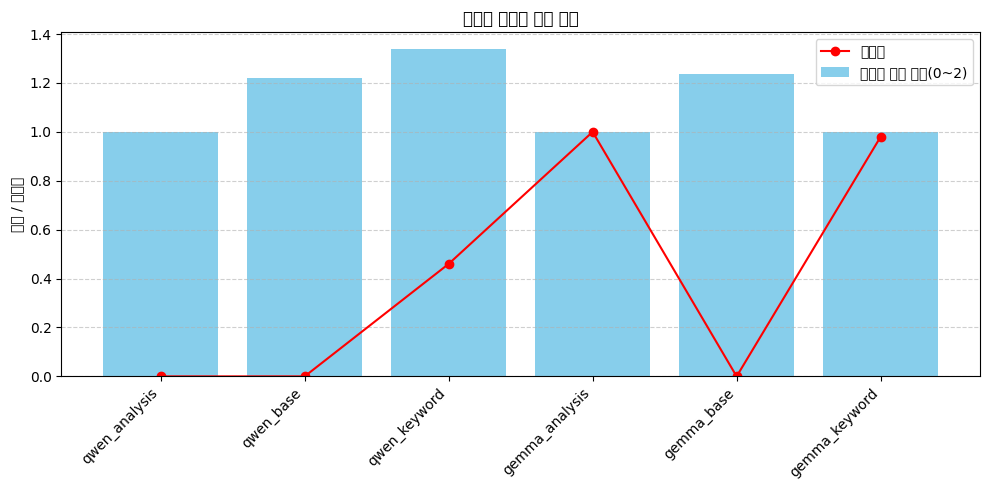

In [9]:
# ============================================
# 📌 코랩 한글 폰트 설정 + 모델 성능 비교 자동화 (완성본)
# ============================================

# 0) 한글 폰트 설치
!apt-get -qq install fonts-nanum

# 1) matplotlib에 한글 폰트 등록
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import glob

# 설치된 나눔 계열 폰트 확인
font_list = glob.glob("/usr/share/fonts/truetype/nanum/*.ttf")
print("📌 설치된 폰트:", font_list)

# 나눔고딕 우선, 없으면 나눔코딩체 사용
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
if not fm.FontProperties(fname=font_path).get_name():
    font_path = "/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf"

font_name = fm.FontProperties(fname=font_path).get_name()
mpl.rc("font", family=font_name)
mpl.rc("axes", unicode_minus=False)
print("✅ 적용된 폰트:", font_name)


# ============================================
# 📌 모델별 대응책 성능 비교 자동화
# ============================================

import pandas as pd
import re

# CSV 경로 (드라이브 AYE 폴더)
files = {
    "qwen_analysis": "/content/drive/MyDrive/AYE/qwen_analysis_sample50.csv",
    "qwen_base": "/content/drive/MyDrive/AYE/qwen_base_sample50.csv",
    "qwen_keyword": "/content/drive/MyDrive/AYE/qwen_keyword_sample50.csv",
    "gemma_analysis": "/content/drive/MyDrive/AYE/gemma_analysis_sample50.csv",
    "gemma_base": "/content/drive/MyDrive/AYE/gemma_base_sample200.csv",
    "gemma_keyword": "/content/drive/MyDrive/AYE/gemma_keyword_sample50.csv",
}

# 대응책 키워드
keywords = ["신고", "경찰", "112", "금감원", "고객센터", "차단", "환급", "금융기관", "은행"]

def score_response(text):
    if not isinstance(text, str) or len(text.strip()) == 0:
        return 0
    found = [kw for kw in keywords if kw in text]
    if len(found) == 0:
        return 1
    return 2

def calc_metrics(df):
    outputs = df["model_output"].astype(str)
    scores = [score_response(x) for x in outputs]
    avg_score = sum(scores) / len(scores)
    error_pattern = re.compile(r"error|Traceback|Exception|\*{5,}", re.IGNORECASE)
    error_count = sum(bool(error_pattern.search(x)) for x in outputs)
    error_rate = error_count / len(outputs)
    return avg_score, error_rate

# 결과 계산
results = {}
for name, path in files.items():
    df = pd.read_csv(path)
    results[name] = calc_metrics(df)

metrics_df = pd.DataFrame(results, index=["avg_score", "error_rate"]).T
metrics_df = metrics_df.reset_index().rename(columns={"index": "model"})
print("=== 성능 비교 결과 ===")
print(metrics_df)

# 시각화
plt.figure(figsize=(10,5))
plt.bar(metrics_df["model"], metrics_df["avg_score"], color="skyblue", label="대응책 평균 점수(0~2)")
plt.plot(metrics_df["model"], metrics_df["error_rate"], color="red", marker="o", label="에러율")

plt.xticks(rotation=45, ha="right")
plt.ylabel("점수 / 에러율")
plt.title("모델별 대응책 성능 비교")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


=== Performance Comparison Results ===
            model  avg_score  error_rate
0   qwen_analysis        1.0        0.00
1       qwen_base        1.0        0.00
2    qwen_keyword        1.0        0.46
3  gemma_analysis        1.0        1.00
4      gemma_base        1.0        0.00
5   gemma_keyword        1.0        0.98


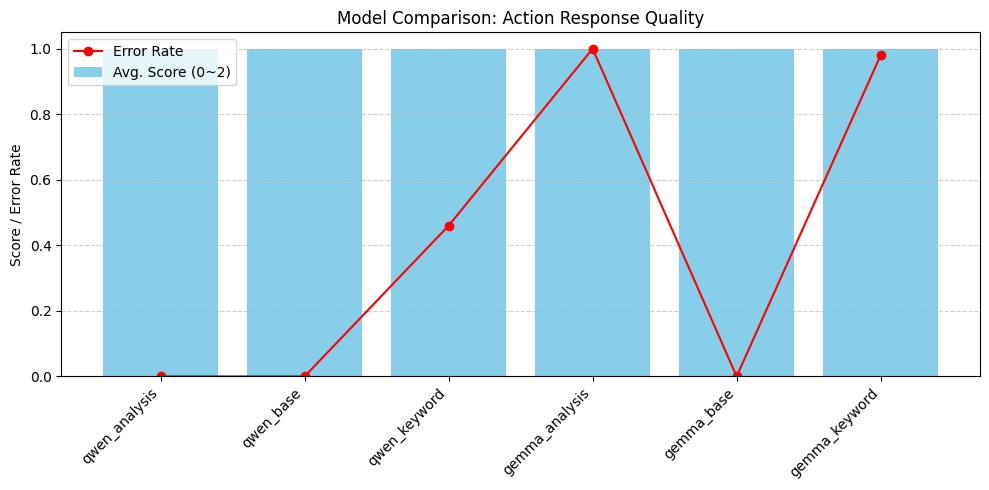

In [10]:
# ============================================
# 📌 Model Performance Comparison (English Only)
# ============================================

import pandas as pd
import re
import matplotlib.pyplot as plt

# 1) CSV file paths (Drive AYE folder)
files = {
    "qwen_analysis": "/content/drive/MyDrive/AYE/qwen_analysis_sample50.csv",
    "qwen_base": "/content/drive/MyDrive/AYE/qwen_base_sample50.csv",
    "qwen_keyword": "/content/drive/MyDrive/AYE/qwen_keyword_sample50.csv",
    "gemma_analysis": "/content/drive/MyDrive/AYE/gemma_analysis_sample50.csv",
    "gemma_base": "/content/drive/MyDrive/AYE/gemma_base_sample200.csv",
    "gemma_keyword": "/content/drive/MyDrive/AYE/gemma_keyword_sample50.csv",
}

# 2) Keyword dictionary for action-oriented responses
keywords = ["report", "police", "112", "FSS", "call center", "block", "refund", "bank"]

def score_response(text):
    """Evaluate response score based on presence of action keywords"""
    if not isinstance(text, str) or len(text.strip()) == 0:
        return 0  # No response
    found = [kw for kw in keywords if kw in text]
    if len(found) == 0:
        return 1  # Vague response
    return 2  # Concrete & realistic response

def calc_metrics(df):
    outputs = df["model_output"].astype(str)

    # Response score
    scores = [score_response(x) for x in outputs]
    avg_score = sum(scores) / len(scores)

    # Error rate (JSON errors, tracebacks, or corrupted output)
    error_pattern = re.compile(r"error|Traceback|Exception|\*{5,}", re.IGNORECASE)
    error_count = sum(bool(error_pattern.search(x)) for x in outputs)
    error_rate = error_count / len(outputs)

    return avg_score, error_rate

# 3) Compute metrics for all files
results = {}
for name, path in files.items():
    df = pd.read_csv(path)
    results[name] = calc_metrics(df)

# 4) Summary table
metrics_df = pd.DataFrame(results, index=["avg_score", "error_rate"]).T
metrics_df = metrics_df.reset_index().rename(columns={"index": "model"})
print("=== Performance Comparison Results ===")
print(metrics_df)

# 5) Visualization
plt.figure(figsize=(10,5))
plt.bar(metrics_df["model"], metrics_df["avg_score"], color="skyblue", label="Avg. Score (0~2)")
plt.plot(metrics_df["model"], metrics_df["error_rate"], color="red", marker="o", label="Error Rate")

plt.xticks(rotation=45, ha="right")
plt.ylabel("Score / Error Rate")
plt.title("Model Comparison: Action Response Quality")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


In [11]:
# ============================================
# 📌 A/B ChatGPT Judge for Model Comparison
# ============================================

!pip install openai -q

import openai
import pandas as pd
from tqdm import tqdm

# 🔑 OpenAI API 키 설정 (Colab에서 실행 시, 환경변수 등록 권장)
openai.api_key = "YOUR_API_KEY"

# ✅ 비교할 CSV 불러오기 (예: Qwen Base vs Qwen Analysis)
df_A = pd.read_csv("/content/drive/MyDrive/AYE/qwen_base_sample50.csv")
df_B = pd.read_csv("/content/drive/MyDrive/AYE/qwen_analysis_sample50.csv")

# ⚠️ 두 파일은 같은 input_text 순서여야 함
assert len(df_A) == len(df_B)

def judge_pair(input_text, output_A, output_B):
    """ChatGPT를 심판으로 불러서 A vs B 평가"""
    prompt = f"""
You are a judge evaluating two model responses for a given input.
The task: Voice phishing detection assistant should provide realistic and useful countermeasures.

Input: {input_text}

Response A:
{output_A}

Response B:
{output_B}

Question: Which response gives a more realistic and useful countermeasure?
Answer only with one word: "A", "B", or "Tie".
"""
    try:
        response = openai.ChatCompletion.create(
            model="gpt-4o-mini",  # 빠른 판정용
            messages=[{"role": "user", "content": prompt}],
            temperature=0
        )
        return response.choices[0].message["content"].strip()
    except Exception as e:
        return "Error"

# 🔄 전체 데이터셋에 대해 판정
results = []
for i in tqdm(range(len(df_A))):
    input_text = df_A["input_text"].iloc[i]
    output_A = df_A["model_output"].iloc[i]
    output_B = df_B["model_output"].iloc[i]
    winner = judge_pair(input_text, output_A, output_B)
    results.append(winner)

# ✅ 결과 집계
summary = pd.Series(results).value_counts(normalize=True) * 100
print("=== A/B Comparison Results ===")
print(summary)

# ✅ 표로 보기 쉽게
summary_df = pd.Series(results).value_counts().reset_index()
summary_df.columns = ["Result", "Count"]
print(summary_df)


100%|██████████| 50/50 [00:00<00:00, 29763.72it/s]

=== A/B Comparison Results ===
Error    100.0
Name: proportion, dtype: float64
  Result  Count
0  Error     50


In [12]:
# ============================================
# 📌 Step 1. OpenAI API Key 설정
# ============================================
import os
import openai

# 🔑 API Key 직접 입력 (또는 환경변수에서 불러오기)
os.environ["OPENAI_API_KEY"] = "sk-xxxxx"   # 👉 여기에 본인 Key 입력
openai.api_key = os.getenv("OPENAI_API_KEY")

# ============================================
# 📌 Step 2. 비교할 CSV 불러오기
# ============================================
import pandas as pd

df_A = pd.read_csv("/content/drive/MyDrive/AYE/qwen_base_sample50.csv")
df_B = pd.read_csv("/content/drive/MyDrive/AYE/qwen_analysis_sample50.csv")

assert len(df_A) == len(df_B), "❌ CSV 길이가 다릅니다!"

# ============================================
# 📌 Step 3. ChatGPT 판정 함수
# ============================================
def judge_pair(input_text, output_A, output_B):
    prompt = f"""
You are a judge evaluating two model responses for a given input.
The task: Voice phishing detection assistant should provide realistic and useful countermeasures.

Input: {input_text}

Response A:
{output_A}

Response B:
{output_B}

Question: Which response gives a more realistic and useful countermeasure?
Answer only with one word: "A", "B", or "Tie".
"""
    try:
        response = openai.ChatCompletion.create(
            model="gpt-4o-mini",   # ⚠️ 필요 시 "gpt-4o" 로 교체
            messages=[{"role": "user", "content": prompt}],
            temperature=0
        )
        return response.choices[0].message["content"].strip()
    except Exception as e:
        return f"Error: {e}"

# ============================================
# 📌 Step 4. 단일 샘플 테스트
# ============================================
test_result = judge_pair(
    df_A["input_text"].iloc[0],
    df_A["model_output"].iloc[0],
    df_B["model_output"].iloc[0]
)
print("🔍 단일 샘플 판정 결과:", test_result)

# ============================================
# 📌 Step 5. 전체 실행 (정상 동작 확인 후)
# ============================================
from tqdm import tqdm

results = []
for i in tqdm(range(len(df_A))):
    winner = judge_pair(
        df_A["input_text"].iloc[i],
        df_A["model_output"].iloc[i],
        df_B["model_output"].iloc[i]
    )
    results.append(winner)

# 집계
summary = pd.Series(results).value_counts(normalize=True) * 100
print("\n=== A/B Comparison Results ===")
print(summary)

summary_df = pd.Series(results).value_counts().reset_index()
summary_df.columns = ["Result", "Count"]
print(summary_df)


🔍 단일 샘플 판정 결과: Error: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742



100%|██████████| 50/50 [00:00<00:00, 34761.35it/s]


=== A/B Comparison Results ===
Error: \n\nYou tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.\n\nYou can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. \n\nAlternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`\n\nA detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742\n    100.0
Name: proportion, dtype: float64
                                              Result  Count
0  Error: \n\nYou tried to access openai.ChatComp...     50


In [13]:
# ============================================
# 📌 Step 1. OpenAI API Key 설정
# ============================================
!pip install --upgrade openai -q

import os
from openai import OpenAI

os.environ["OPENAI_API_KEY"] = "sk-xxxxx"   # 👉 본인 API 키 입력
client = OpenAI(api_key=os.environ["OPENAI_API_KEY"])

# ============================================
# 📌 Step 2. CSV 불러오기
# ============================================
import pandas as pd

df_A = pd.read_csv("/content/drive/MyDrive/AYE/qwen_base_sample50.csv")
df_B = pd.read_csv("/content/drive/MyDrive/AYE/qwen_analysis_sample50.csv")

assert len(df_A) == len(df_B), "❌ CSV 길이가 다릅니다!"

# ============================================
# 📌 Step 3. ChatGPT 판정 함수 (신규 SDK)
# ============================================
def judge_pair(input_text, output_A, output_B):
    prompt = f"""
You are a judge evaluating two model responses for a given input.
The task: Voice phishing detection assistant should provide realistic and useful countermeasures.

Input: {input_text}

Response A:
{output_A}

Response B:
{output_B}

Question: Which response gives a more realistic and useful countermeasure?
Answer only with one word: "A", "B", or "Tie".
"""
    try:
        response = client.chat.completions.create(
            model="gpt-4o-mini",   # 필요 시 "gpt-4o" 로 교체
            messages=[{"role": "user", "content": prompt}],
            temperature=0
        )
        return response.choices[0].message.content.strip()
    except Exception as e:
        return f"Error: {e}"

# ============================================
# 📌 Step 4. 단일 샘플 테스트
# ============================================
test_result = judge_pair(
    df_A["input_text"].iloc[0],
    df_A["model_output"].iloc[0],
    df_B["model_output"].iloc[0]
)
print("🔍 단일 샘플 판정 결과:", test_result)

# ============================================
# 📌 Step 5. 전체 실행
# ============================================
from tqdm import tqdm

results = []
for i in tqdm(range(len(df_A))):
    winner = judge_pair(
        df_A["input_text"].iloc[i],
        df_A["model_output"].iloc[i],
        df_B["model_output"].iloc[i]
    )
    results.append(winner)

# 집계
summary = pd.Series(results).value_counts(normalize=True) * 100
print("\n=== A/B Comparison Results ===")
print(summary)

summary_df = pd.Series(results).value_counts().reset_index()
summary_df.columns = ["Result", "Count"]
print(summary_df)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 787.8/787.8 kB 12.6 MB/s eta 0:00:00
🔍 단일 샘플 판정 결과: Error: Error code: 401 - {'error': {'message': 'Incorrect API key provided: sk-xxxxx. You can find your API key at https://platform.openai.com/account/api-keys.', 'type': 'invalid_request_error', 'param': None, 'code': 'invalid_api_key'}}


100%|██████████| 50/50 [00:11<00:00,  4.23it/s]


=== A/B Comparison Results ===
Error: Error code: 401 - {'error': {'message': 'Incorrect API key provided: sk-xxxxx. You can find your API key at https://platform.openai.com/account/api-keys.', 'type': 'invalid_request_error', 'param': None, 'code': 'invalid_api_key'}}    100.0
Name: proportion, dtype: float64
                                              Result  Count
0  Error: Error code: 401 - {'error': {'message':...     50
